# 신경망 모델 훈련

In [117]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적 설정
import tensorflow as tf

# TensorFlow에서 랜덤 시드를 설정
# 이는 모델 초기화, 랜덤 샘플링 등에서 일관된 결과를 얻음
tf.keras.utils.set_random_seed(42)

# TensorFlow의 모든 연산을 결정적으로 설정
# 이를 통해 결과의 재현성을 보장
tf.config.experimental.enable_op_determinism()


## 손실 곡선

In [118]:
# 텐서플로우와 사이킷런에서 필요한 모듈 임포트
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 패션 MNIST 데이터셋을 로드하고 학습 데이터와 테스트 데이터로 분할
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 입력 데이터를 0과 1 사이의 값으로 스케일 조정
train_scaled = train_input / 255.0

# 학습 데이터를 학습 세트와 검증 세트로 분할
# 검증 세트는 학습 시 과적합을 방지하기 위해 사용
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [119]:
def model_fn(a_layer=None):
    # 새로운 Sequential 모델을 생성합
    model = keras.Sequential()
    # 입력 레이어를 추가하고 28x28 형태의 이미지를 1차원 배열로 펼침
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    # 100개의 뉴런을 가진 은닉층을 추가하고 활성화 함수로 ReLU를 사용합니다.
    model.add(keras.layers.Dense(100, activation='relu'))
    # 만약 a_layer가 주어졌다면, 그 레이어를 모델에 추가합니다.
    if a_layer:
        model.add(a_layer)
    # 출력 레이어를 추가하고 활성화 함수로 softmax를 사용하여 각 클래스에 대한 확률을 반환합니다.
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [120]:
# model_fn 함수를 사용하여 모델을 생성합니다.
model = model_fn()

# 생성된 모델의 요약 정보를 출력합니다.
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_33 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# 모델을 컴파일 
# 손실 함수: sparse_categorical_crossentropy를 사용, 정확도 측정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델을 학습시키고 학습 이력을 저장, 학습 데이터와 타겟을 사용, 5번의 에포크를 수행
# verbose=0은 학습 과정의 출력을 생략함을 의미
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

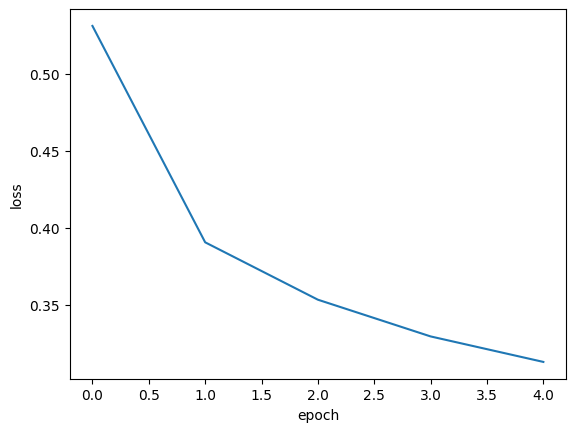

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

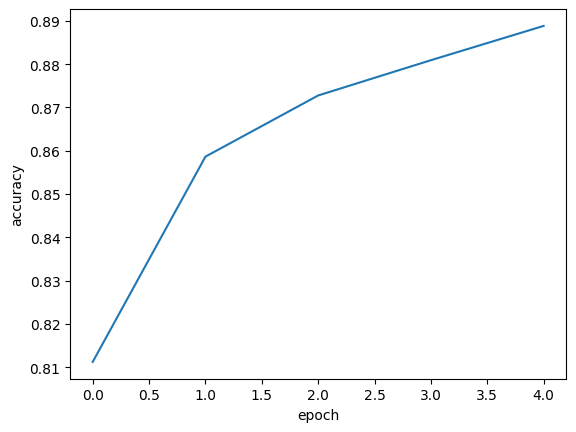

In [123]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [124]:
# 새로운 모델 객체 생성
model = model_fn()
# 모델을 컴파일 
# 손실 함수: sparse_categorical_crossentropy를 사용, 정확도 측정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델을 학습시키고 학습 이력을 저장, 학습 데이터와 타겟을 사용, 20번의 에포크를 수행
# verbose=0은 학습 과정의 출력을 생략함을 의미
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

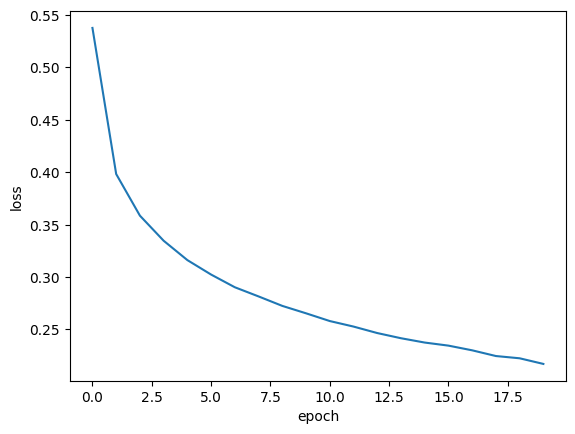

In [125]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

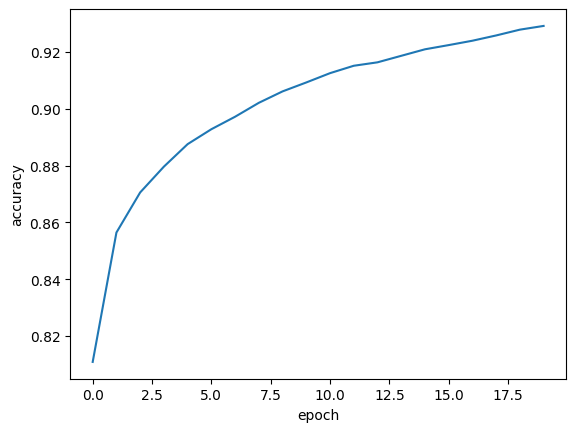

In [126]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

In [127]:
# 새로운 모델을 생성
model = model_fn()
# 모델을 컴파일, 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 20번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

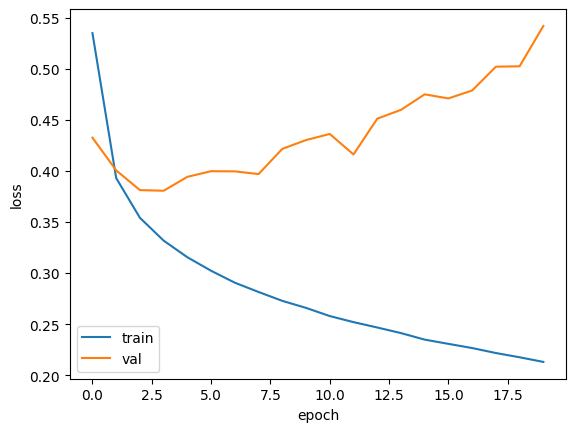

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [129]:
# 새로운 모델을 생성
model = model_fn()
# 모델을 컴파일, 옵티마이저로는 Adam을 사용, 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 20번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

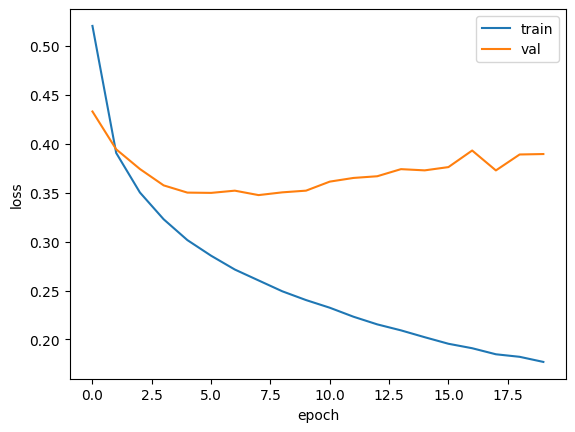

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [131]:
# Dropout을 포함한 새로운 모델을 생성
model = model_fn(keras.layers.Dropout(0.3))

# 생성된 모델의 요약 정보를 출력
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# 모델을 Adam 옵티마이저로 컴파일
# 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 20번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

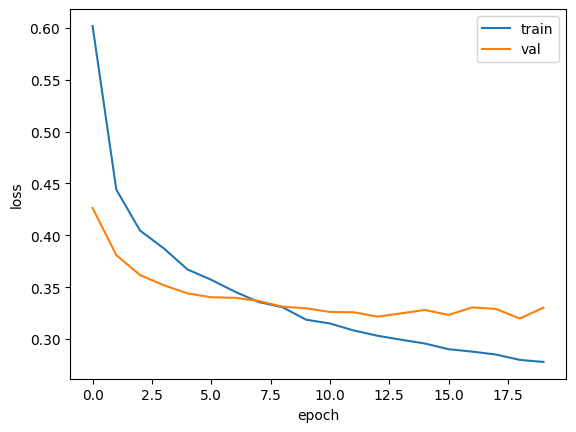

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [134]:
# Dropout을 포함한 새로운 모델을 생성합니다.
model = model_fn(keras.layers.Dropout(0.3))

# 모델을 Adam 옵티마이저로 컴파일
# 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 10번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [135]:
# 모델의 가중치를 파일로 저장
# 파일 이름은 'model-weights.weights.h5'로 지정
model.save_weights('model-weights.weights.h5')

In [136]:
# 전체 모델을 H5 포맷으로 저장
# 파일 이름은 'model-whole.h5'로 지정
model.save('model-whole.h5')

In [137]:
# Dropout을 포함한 새로운 모델을 생성
model = model_fn(keras.layers.Dropout(0.3))

# 저장된 모델의 가중치를 불러옴
model.load_weights('model-weights.weights.h5')

In [138]:
import numpy as np

# 검증 데이터에 대한 예측을 수행
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# 예측한 레이블과 실제 레이블을 비교하여 정확도를 계산하고 출력
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
0.8815833333333334


In [139]:
# 저장된 전체 모델을 불러옴
model = keras.models.load_model('model-whole.h5')

# 검증 데이터에 대해 모델을 평가하고 손실과 정확도를 출력합니다.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8838 - loss: 0.3222


[0.32654261589050293, 0.8815833330154419]

## 조기 종료

In [140]:
# Dropout을 포함한 새로운 모델을 생성
model = model_fn(keras.layers.Dropout(0.3))

# 모델을 Adam 옵티마이저로 컴파일
# 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 가장 좋은 성능을 보인 모델을 저장하기 위한 콜백을 설정
# save_best_only=True로 설정하여 최상의 성능을 보인 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 20번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
# 모델이 학습하는 동안 콜백을 활용하여 가장 좋은 모델을 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [141]:
# 저장된 가장 좋은 성능을 보인 모델을 불러옴
model = keras.models.load_model('best-model.keras')

# 검증 데이터에 대해 모델을 평가하고 손실과 정확도를 출력합니다.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8887 - loss: 0.3148


[0.31869831681251526, 0.8869166374206543]

In [142]:
# Dropout을 포함한 새로운 모델을 생성
model = model_fn(keras.layers.Dropout(0.3))

# 모델을 Adam 옵티마이저로 컴파일
# 손실 함수로는 sparse_categorical_crossentropy를 사용, 정확도를 측정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 가장 좋은 성능을 보인 모델을 저장하기 위한 콜백을 설정
# save_best_only=True로 설정하여 최상의 성능을 보인 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

# 조기 종료를 위한 콜백을 설정
# patience=2로 설정하여 두 번 연속 검증 손실이 향상되지 않으면 학습을 조기 종료
# restore_best_weights=True로 설정하여 가장 좋은 성능을 보인 모델의 가중치로 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 모델을 학습시키고 학습 이력을 저장
# 학습 데이터와 타겟을 사용하며, 20번의 에포크를 수행
# 검증 데이터를 사용하여 학습 과정에서의 성능을 평가
# 모델이 학습하는 동안 콜백을 활용하여 가장 좋은 모델을 저장하고, 조기 종료를 수행
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [143]:
# 조기 종료 콜백이 학습을 멈춘 마지막 에포크를 출력
print(early_stopping_cb.stopped_epoch)

15


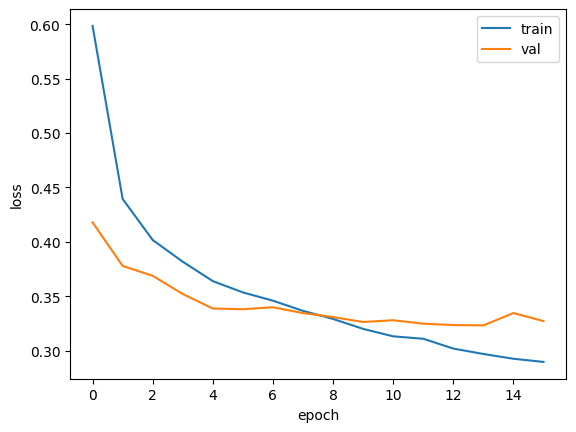

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [145]:
# 학습된 모델을 사용하여 검증 데이터에 대해 평가하고 손실과 정확도를 출력합니다.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8824 - loss: 0.3219


[0.3231157660484314, 0.8832499980926514]